In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
def get_std_scaled(df=None):
    df_copy = df.copy()
    std_scaler = StandardScaler()
    df_copy = std_scaler.fit_transform(df_copy)
    return df_copy

def get_minmax_scaled(df=None):
    df_copy = df.copy()
    std_scaler = MinMaxScaler()
    df_copy = std_scaler.fit_transform(df_copy)
    return df_copy

In [5]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, f1_score: {3:.4f}'.format(accuracy, precision, recall, f1))

In [19]:
train_df = pd.read_csv('../EDA&FE/train_tsne_ss_per40.csv')
valid_df = pd.read_csv('../EDA&FE/valid_tsne_ss_per40.csv')
test_df = pd.read_csv('../EDA&FE/test_tsne_ss_per40.csv')

In [20]:
train_df.head()

,Unnamed: 0,new_V1,new_V2
0,0,-13.763436,-7.289884
1,1,-33.079887,-16.390795
2,2,27.755302,-23.883419
3,3,13.823494,5.252245
4,4,10.995240,-32.925716


In [21]:
valid_df.head()

,Unnamed: 0,new_V1,new_V2,Class
0,0,2.167414,-33.192738,0.0
1,1,9.330505,51.526775,0.0
2,2,-35.912807,36.804447,0.0
3,3,8.160899,51.139347,0.0
4,4,-53.902363,5.765299,0.0


In [22]:
test_df.head()

,Unnamed: 0,new_V1,new_V2
0,0,-1.456251,-17.086267
1,1,-7.646030,3.574741
2,2,11.258976,1.629882
3,3,-6.320200,32.871918
4,4,35.649750,-6.683914


In [23]:
train_df = train_df.iloc[:, 1:]
valid_df = valid_df.iloc[:, 1:]
test_df = test_df.iloc[:, 1:]

In [24]:
train_df.head()

,new_V1,new_V2
0,-13.763436,-7.289884
1,-33.079887,-16.390795
2,27.755302,-23.883419
3,13.823494,5.252245
4,10.995240,-32.925716


In [25]:
valid_df.head()

,new_V1,new_V2,Class
0,2.167414,-33.192738,0.0
1,9.330505,51.526775,0.0
2,-35.912807,36.804447,0.0
3,8.160899,51.139347,0.0
4,-53.902363,5.765299,0.0


In [26]:
test_df.head()

,new_V1,new_V2
0,-1.456251,-17.086267
1,-7.646030,3.574741
2,11.258976,1.629882
3,-6.320200,32.871918
4,35.649750,-6.683914


In [35]:
lof_clf = LocalOutlierFactor(n_neighbors=40, novelty=True, contamination='auto')
lof_clf.fit(train_df)

LocalOutlierFactor(n_neighbors=40, novelty=True)

In [36]:
pred_val = lof_clf.predict(valid_df.iloc[:, :-1])

In [37]:
pred_val_edit = np.where(pred_val==1, 0, 1)

In [38]:
get_clf_eval(valid_df['Class'], pred_val_edit)

오차 행렬
[[ 6487 21945]
 [   18    12]]
정확도: 0.2283, 정밀도: 0.0005, 재현율: 0.4000, f1_score: 0.0011


In [39]:
params = {'n_neighbors' : [20, 30, 40, 50], 'p' : [2, 3, 4], 'contamination' : ['auto', 0.00001, 0.00005, 0.0001, 0.0005, 0.001]}

In [40]:
lof_clf = LocalOutlierFactor(novelty=True)
grid_cv = GridSearchCV(lof_clf, param_grid=params, scoring='f1_macro', cv=3, verbose=1)
grid_cv.fit(train_df)
print('최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
최고 평균 정확도 수치: nan
최적 하이퍼 파라미터: {'contamination': 'auto', 'n_neighbors': 20, 'p': 2}


In [47]:
scores_df = pd.DataFrame(grid_cv.cv_results_)
scores_df[['params', 'rank_test_score']].sort_values('rank_test_score')

,params,rank_test_score
0,"{'contamination': 'auto', 'n_neighbors': 20, '...",1
51,"{'contamination': 0.0005, 'n_neighbors': 30, '...",2
50,"{'contamination': 0.0005, 'n_neighbors': 20, '...",3
49,"{'contamination': 0.0005, 'n_neighbors': 20, '...",4
48,"{'contamination': 0.0005, 'n_neighbors': 20, '...",5
...,...,...
21,"{'contamination': 1e-05, 'n_neighbors': 50, 'p...",68
20,"{'contamination': 1e-05, 'n_neighbors': 40, 'p...",69
19,"{'contamination': 1e-05, 'n_neighbors': 40, 'p...",70
70,"{'contamination': 0.001, 'n_neighbors': 50, 'p...",71


In [48]:
best_clf = grid_cv.best_estimator_
best_pred = best_clf.predict(valid_df.iloc[:, :-1])
best_pred_edit = np.where(best_pred == -1, 1, 0)
get_clf_eval(valid_df['Class'], best_pred_edit)
f1 = f1_score(valid_df['Class'], best_pred_edit)
print('최적의 파라미터를 사용한 f1 score: {0:.4f}'.format(f1))

오차 행렬
[[ 5179 23253]
 [   15    15]]
정확도: 0.1825, 정밀도: 0.0006, 재현율: 0.5000, f1_score: 0.0013
최적의 파라미터를 사용한 f1 score: 0.0013


In [6]:
train_df = pd.read_csv('../EDA&FE/train_tsne_per50.csv')
valid_df = pd.read_csv('../EDA&FE/valid_tsne_per50.csv')
test_df = pd.read_csv('../EDA&FE/test_tsne_per50.csv')

In [7]:
train_df.head()

,Unnamed: 0,new_V1,new_V2
0,0,-25.949516,-4.931961
1,1,-26.961325,-11.588001
2,2,-41.478424,-7.813858
3,3,5.198158,17.411676
4,4,30.668156,32.288430


In [8]:
valid_df.head()

,Unnamed: 0,new_V1,new_V2,Class
0,0,70.732796,28.870825,0.0
1,1,-53.012943,-2.597133,0.0
2,2,-36.816330,-13.099642,0.0
3,3,-51.705795,-1.571829,0.0
4,4,16.767071,15.646789,0.0


In [9]:
test_df.head()

,Unnamed: 0,new_V1,new_V2
0,0,0.767361,20.434359
1,1,-27.686018,24.424936
2,2,1.871572,22.924133
3,3,0.676817,-30.278225
4,4,-6.839435,33.764350


In [10]:
train_df = train_df.iloc[:, 1:]
valid_df = valid_df.iloc[:, 1:]
test_df = test_df.iloc[:, 1:]

In [11]:
train_df.head()

,new_V1,new_V2
0,-25.949516,-4.931961
1,-26.961325,-11.588001
2,-41.478424,-7.813858
3,5.198158,17.411676
4,30.668156,32.288430


In [12]:
valid_df.head()

,new_V1,new_V2,Class
0,70.732796,28.870825,0.0
1,-53.012943,-2.597133,0.0
2,-36.816330,-13.099642,0.0
3,-51.705795,-1.571829,0.0
4,16.767071,15.646789,0.0


In [13]:
test_df.head()

,new_V1,new_V2
0,0.767361,20.434359
1,-27.686018,24.424936
2,1.871572,22.924133
3,0.676817,-30.278225
4,-6.839435,33.764350


In [14]:
params = {'n_neighbors' : [20, 30, 40, 50], 'p' : [2, 3, 4], 'contamination' : ['auto', 0.00001, 0.00005, 0.0001, 0.0005, 0.001]}

In [15]:
lof_clf = LocalOutlierFactor(novelty=True)
grid_cv = GridSearchCV(lof_clf, param_grid=params, scoring='f1_macro', cv=3, verbose=1)
grid_cv.fit(train_df)
print('최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
최고 평균 정확도 수치: nan
최적 하이퍼 파라미터: {'contamination': 'auto', 'n_neighbors': 20, 'p': 2}


In [16]:
scores_df = pd.DataFrame(grid_cv.cv_results_)
scores_df[['params', 'rank_test_score']].sort_values('rank_test_score')

,params,rank_test_score
0,"{'contamination': 'auto', 'n_neighbors': 20, '...",1
51,"{'contamination': 0.0005, 'n_neighbors': 30, '...",2
50,"{'contamination': 0.0005, 'n_neighbors': 20, '...",3
49,"{'contamination': 0.0005, 'n_neighbors': 20, '...",4
48,"{'contamination': 0.0005, 'n_neighbors': 20, '...",5
...,...,...
21,"{'contamination': 1e-05, 'n_neighbors': 50, 'p...",68
20,"{'contamination': 1e-05, 'n_neighbors': 40, 'p...",69
19,"{'contamination': 1e-05, 'n_neighbors': 40, 'p...",70
70,"{'contamination': 0.001, 'n_neighbors': 50, 'p...",71


In [17]:
best_clf = grid_cv.best_estimator_
best_pred = best_clf.predict(valid_df.iloc[:, :-1])
best_pred_edit = np.where(best_pred == -1, 1, 0)
get_clf_eval(valid_df['Class'], best_pred_edit)
f1 = f1_score(valid_df['Class'], best_pred_edit)
print('최적의 파라미터를 사용한 f1 score: {0:.4f}'.format(f1))

오차 행렬
[[ 6480 21952]
 [    1    29]]
정확도: 0.2287, 정밀도: 0.0013, 재현율: 0.9667, f1_score: 0.0026
최적의 파라미터를 사용한 f1 score: 0.0026


In [31]:
valid_pred_df = pd.DataFrame(np.concatenate((valid_df.iloc[:, :-1].values, best_pred_edit.reshape(-1, 1)), axis=1), columns = ['tsne_V1', 'tsne_V2', 'Class'])
valid_pred_df.head()

,tsne_V1,tsne_V2,Class
0,70.732796,28.870825,1.0
1,-53.012943,-2.597133,1.0
2,-36.816330,-13.099642,0.0
3,-51.705795,-1.571829,1.0
4,16.767071,15.646789,1.0


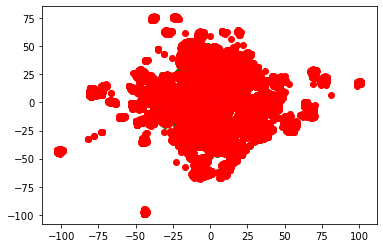

In [38]:
plt.scatter(valid_pred_df[valid_pred_df['Class']==0].tsne_V1, valid_pred_df[valid_pred_df['Class']==0].tsne_V2, color='green')
plt.scatter(valid_pred_df[valid_pred_df['Class']==1].tsne_V1, valid_pred_df[valid_pred_df['Class']==1].tsne_V2, color='red')

plt.show()

In [18]:
best_clf = grid_cv.best_estimator_
best_test_pred = best_clf.predict(test_df)
best_test_pred_edit = np.where(best_test_pred == -1, 1, 0)

In [21]:
test_df = pd.read_csv('../EDA&FE/test.csv')
test_id = test_df['ID'].values.reshape(-1, 1)
final_test_pred = pd.DataFrame(np.concatenate((test_id, best_test_pred_edit.reshape(-1, 1)), axis=1), columns=['ID', 'Class'])
final_test_pred.head()

,ID,Class
0,AAAA0x1,0
1,AAAA0x2,1
2,AAAA0x5,0
3,AAAA0x7,0
4,AAAA0xc,1


In [24]:
final_test_pred.to_csv('./test_pred_tsne_per50.csv', index = False)